\The Myers-Briggs Type Indicator (MBTI) is a popular and widely used psychological tool designed to measure and categorize individuals based on their preferences in four dichotomies. These dichotomies are used to create 16 personality types. Here are the four dichotomies:

1. **Extraversion (E) vs. Introversion (I):**
   - Extraversion: Focus on the outer world, sociable, and expressive.
   - Introversion: Focus on the inner world, reflective, and reserved.

2. **Sensing (S) vs. Intuition (N):**
   - Sensing: Focus on concrete and practical information, rely on facts and details.
   - Intuition: Focus on possibilities and potential, rely on insights and imagination.

3. **Thinking (T) vs. Feeling (F):**
   - Thinking: Decision-making based on logic and objective analysis.
   - Feeling: Decision-making based on values, empathy, and subjective considerations.

4. **Judging (J) vs. Perceiving (P):**
   - Judging: Prefer a planned and organized approach, enjoy closure and decisiveness.
   - Perceiving: Prefer a flexible and spontaneous approach, enjoy openness and adaptability.

The combination of these preferences results in 16 distinct personality types, each represented by a four-letter code (e.g., ISTJ, ENFP, INFJ). The MBTI is often used in various contexts, including personal development, team-building, career counseling, and relationship counseling.

It's important to note that while the MBTI is widely used and has its popularity, it has also faced criticism from some psychologists for lacking scientific validity and reliability in measuring personality traits. It is seen by many as a tool for self-reflection and discussion rather than a definitive measure of personality. Individuals may find it interesting and insightful, but it's not considered a strict scientific assessment.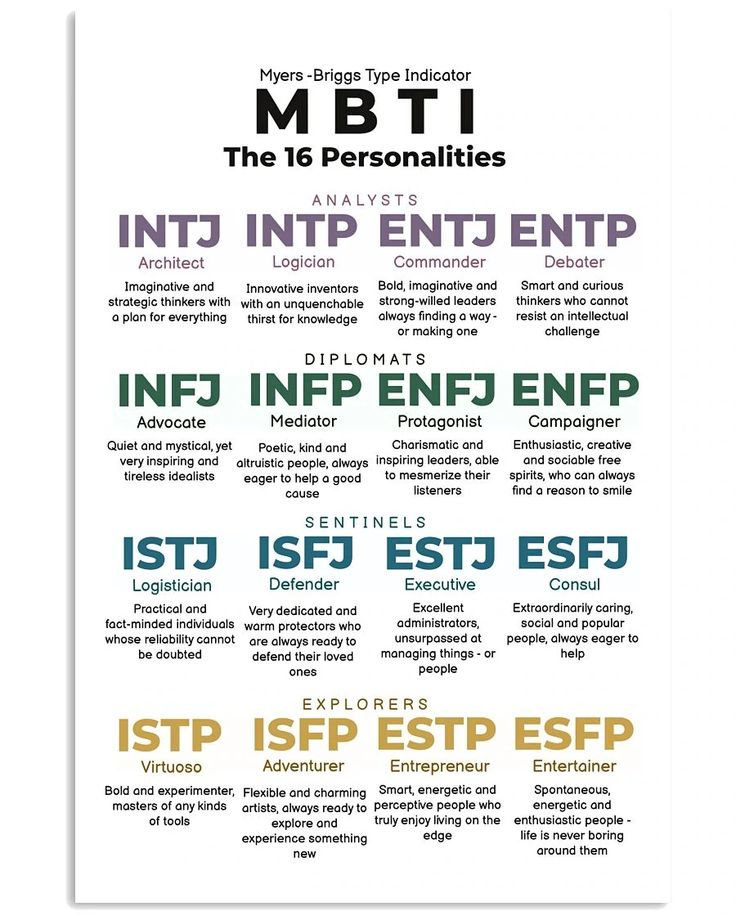

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install catboost


In [ ]:
import pandas as pd
# from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,#GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
# from sklearn.experimental import enable_hist_gradient_boosting
import plotly.express as px
import warnings
import numpy as np
from nltk import TweetTokenizer
nltk.download("punkt")
# Download the WordNet data
nltk.download('wordnet')
tk=TweetTokenizer()
nltk.download('stopwords')
sw=stopwords.words('english')

# Download the WordNet data

warnings.filterwarnings('ignore')


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


uploading data set

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data set/project/mbti_1.csv',header=0)
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


about the data set

In [ ]:
data.shape

(8675, 2)

In [ ]:
data.describe(include='O')

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


to count different types of personalities

In [ ]:
data['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [ ]:
px.pie(data,names='type',title='Personality type',hole=0.3)

In [ ]:
data.isna().sum()

type     0
posts    0
dtype: int64

In [ ]:
data["posts"][2]

"'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven't visited this website in the last 3

there are lot for links present in the data where the person searched for posts or posted.Since these links aren"t useful for our data ..so lets clean it.so first let us create some functions.and use that function to clean the data

In [ ]:
def clear_text(d):
    cleaned_text=[]
    for sentence in tqdm(d):
        sentence=sentence.lower()

#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)

#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
        cleaned_text.append(sentence)
    return cleaned_text

re.sub is a method provided by the re (regular expression) module in Python. It stands for "substitute" and is used for replacing occurrences of a pattern in a string with a specified replacement.

In [ ]:
print(len(data["posts"]))

8675


In [ ]:
cleaned_text=clear_text(data["posts"])

100%|██████████| 8675/8675 [00:05<00:00, 1624.21it/s]


In [ ]:
def remove_words(d):
  n_sentence=[]
  removed_text=[]
  for sentence in tqdm(d):
    n_sentence=[i for i in tk.tokenize(sentence) if i not in sw and len(i)>3]
    stri=" ".join(n_sentence)
    removed_text.append(stri)
  return removed_text


In [ ]:
text_after_remove=remove_words(cleaned_text)

100%|██████████| 8675/8675 [01:22<00:00, 104.77it/s]


In [ ]:
text_after_remove[0]

'intj moments sportscenter plays pranks life changing experience life repeat today perc experience immerse last thing infj friend posted facebook committing suicide next rest peace enfj sorry hear distress natural relationship perfection time every moment existence figure hard times times growth 84389 84390 welcome stuff game match prozac wellbrutin least thirty minutes moving legs mean moving sitting desk chair weed moderation maybe edibles healthier alternative basically come three items determined type whichever types want would likely given types cognitive functions whatnot left things moderation sims indeed video game good note good somewhat subjective completely promoting death given dear enfp favorite video games growing current favorite video games cool appears late someone everyone wait thought confidence good thing cherish time solitude revel within inner world whereas time workin enjoy time worry people always around entp ladies complimentary personality well main social out

In [ ]:
def lemmatizing(d):
  lm_sentence=[]
  lemmatized_text=[]
  lemitizer=WordNetLemmatizer()
  for sentence in tqdm(d):
    lm_sentence=[lemitizer.lemmatize(i) for i in tk.tokenize(sentence)]
    stri=" ".join(lm_sentence)
    lemmatized_text.append(stri)
  return lemmatized_text



WordNetLemmatizer:
The WordNetLemmatizer is a part of the Natural Language Toolkit (NLTK) library in Python. It is specifically designed for lemmatization, a process that reduces words to their base or root form, known as a lemma. Lemmatization is a common step in natural language processing and text mining to normalize words and improve the efficiency of downstream tasks.

In [ ]:
lemmatized_text=lemmatizing(text_after_remove)

100%|██████████| 8675/8675 [00:43<00:00, 198.11it/s]


In [ ]:
lemmatized_text[0]

AttributeError

In [ ]:
def word_count(d):
  data_length=[]
  for sentence in tqdm(d):
    data_length.append(len(sentence.split()))
  return data_length

In [ ]:
df=data.copy()
df["clean"]=lemmatized_text
df["word count"]=word_count(lemmatized_text)
df

100%|██████████| 8675/8675 [00:00<00:00, 36807.18it/s]


,type,posts,clean,word count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,intj moment sportscenter play prank life chang...,270
1,ENTP,'I'm finding the lack of me in these posts ver...,finding lack post alarming boring position oft...,484
2,INTP,'Good one _____ https://www.youtube.com/wat...,good course know blessing curse absolutely pos...,399
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation esoteric gabbin...,454
4,ENTJ,'You're fired.|||That's another silly misconce...,fired another silly misconception approaching ...,421
...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,always think cat doms reason website become na...,358
8671,ENFP,'So...if this thread already exists someplace ...,thread already exists someplace else heck dele...,564
8672,INTP,'So many questions when i do these things. I ...,many question thing would take purple pill pic...,444
8673,INFP,'I am very conflicted right now when it comes ...,conflicted right come wanting child honestly m...,697


In [ ]:
Y=df["type"]
X=df["clean"]

In [ ]:
vectorizer=TfidfVectorizer(max_features=5000)
vectorizer.fit(X)

TfidfVectorizer(max_features=5000)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape)
print(Y_train.shape)

(6940,)
(6940,)


In [ ]:
X_train=vectorizer.transform(X_train).toarray()
X_test=vectorizer.transform(X_test).toarray()

In [ ]:
X_train.shape
X_test.shape

(1735, 5000)

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Y_train

4080    INFJ
2614    ENFP
5414    ENTP
1039    ENFP
8294    ENTP
        ... 
5734    INFP
5191    INFP
5390    INFJ
860     INFP
7270    INTJ
Name: type, Length: 6940, dtype: object

In [ ]:
le=LabelEncoder()
Y_train_encoded=le.fit_transform(Y_train)
Y_test_encoded=le.transform(Y_test)

In [ ]:
models_accuracy={}

logic regression

In [ ]:
models_accuracy

{}

In [ ]:
log_re=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
log_re.fit(X_train,Y_train_encoded)
Y_pred_log_re=log_re.predict(X_test)
print(" "*50,log_re)
print("classifcation report",
      classification_report(Y_pred_log_re,Y_test_encoded,
                                                   target_names=le.inverse_transform([i for i in range(16)])))

                                                   LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)
classifcation report               precision    recall  f1-score   support

        ENFJ       0.07      0.43      0.12         7
        ENFP       0.51      0.71      0.60        90
        ENTJ       0.25      0.73      0.37        15
        ENTP       0.53      0.75      0.62        95
        ESFJ       0.00      0.00      0.00         0
        ESFP       0.00      0.00      0.00         0
        ESTJ       0.00      0.00      0.00         0
        ESTP       0.07      1.00      0.12         1
        INFJ       0.69      0.63      0.66       315
        INFP       0.86      0.57      0.69       564
        INTJ       0.70      0.60      0.65       228
        INTP       0.82      0.66      0.73       365
        ISFJ       0.16      1.00      0.27         7
        ISFP       0.09      0.71      0.17         7
        ISTJ       0.11      0.71      0.20         7
        IST

In [ ]:
models_accuracy["LogisticRegression"]=accuracy_score(Y_pred_log_re,Y_test_encoded)

In [ ]:
linear_svc=LinearSVC(C=0.1)
linear_svc.fit(X_train,Y_train_encoded)
Y_pred_linear_svc=linear_svc.predict(X_test)
print(" "*50,linear_svc)
print("classifcation report",
      classification_report(Y_pred_linear_svc,Y_test_encoded,
                                                   target_names=le.inverse_transform([i for i in range(16)])))

                                                   LinearSVC(C=0.1)
classifcation report               precision    recall  f1-score   support

        ENFJ       0.15      0.55      0.23        11
        ENFP       0.60      0.69      0.64       108
        ENTJ       0.39      0.74      0.51        23
        ENTP       0.53      0.69      0.60       104
        ESFJ       0.14      1.00      0.25         1
        ESFP       0.00      0.00      0.00         0
        ESTJ       0.00      0.00      0.00         0
        ESTP       0.27      0.80      0.40         5
        INFJ       0.67      0.65      0.66       296
        INFP       0.85      0.63      0.73       499
        INTJ       0.72      0.62      0.67       225
        INTP       0.82      0.68      0.74       353
        ISFJ       0.38      0.85      0.52        20
        ISFP       0.32      0.71      0.44        24
        ISTJ       0.36      0.76      0.49        21
        ISTP       0.49      0.73      0.59   

In [ ]:
models_accuracy["LinearSVC"]=accuracy_score(Y_pred_linear_svc,Y_test_encoded)

In [ ]:
multinomial_nb=MultinomialNB()
multinomial_nb.fit(X_train,Y_train_encoded)
Y_pred_multinomial_nb=multinomial_nb.predict(X_test)
print(" "*50,linear_svc)
print("classifcation report",
      classification_report(Y_pred_linear_svc,Y_test_encoded,
                                                   target_names=le.inverse_transform([i for i in range(16)])))

                                                   LinearSVC(C=0.1)
classifcation report               precision    recall  f1-score   support

        ENFJ       0.15      0.55      0.23        11
        ENFP       0.60      0.69      0.64       108
        ENTJ       0.39      0.74      0.51        23
        ENTP       0.53      0.69      0.60       104
        ESFJ       0.14      1.00      0.25         1
        ESFP       0.00      0.00      0.00         0
        ESTJ       0.00      0.00      0.00         0
        ESTP       0.27      0.80      0.40         5
        INFJ       0.67      0.65      0.66       296
        INFP       0.85      0.63      0.73       499
        INTJ       0.72      0.62      0.67       225
        INTP       0.82      0.68      0.74       353
        ISFJ       0.38      0.85      0.52        20
        ISFP       0.32      0.71      0.44        24
        ISTJ       0.36      0.76      0.49        21
        ISTP       0.49      0.73      0.59   

In [ ]:
models_accuracy["MultinomialNB"]=accuracy_score(Y_pred_multinomial_nb,Y_test_encoded)

In [ ]:
tree=DecisionTreeClassifier(max_depth=14)
tree.fit(X_train,Y_train_encoded)
Y_pred_tree=tree.predict(X_test)
print(" "*50,tree)
print("classifcation report",
      classification_report(Y_pred_tree,Y_test_encoded,
                                                   target_names=le.inverse_transform([i for i in range(16)])))

                                                   DecisionTreeClassifier(max_depth=14)
classifcation report               precision    recall  f1-score   support

        ENFJ       0.05      0.06      0.05        35
        ENFP       0.42      0.51      0.46       103
        ENTJ       0.20      0.26      0.23        34
        ENTP       0.41      0.49      0.45       114
        ESFJ       0.14      0.33      0.20         3
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.14      0.12      0.13         8
        ESTP       0.07      0.11      0.08         9
        INFJ       0.55      0.61      0.58       258
        INFP       0.73      0.50      0.60       535
        INTJ       0.53      0.50      0.51       208
        INTP       0.63      0.67      0.65       276
        ISFJ       0.11      0.29      0.16        17
        ISFP       0.26      0.34      0.30        41
        ISTJ       0.20      0.33      0.25        27
        ISTP       0.40   

In [ ]:
models_accuracy["DecisionTreeClassifier("]=accuracy_score(Y_pred_tree,Y_test_encoded)

In [ ]:
forest=RandomForestClassifier(max_depth=10)
forest.fit(X_train,Y_train_encoded)
Y_pred_forest=forest.predict(X_test)
print(" "*50,forest)
print("classifcation report",
      classification_report(Y_pred_forest,Y_test_encoded,
                                                   target_names=le.inverse_transform([i for i in range(16)])))

                                                   RandomForestClassifier(max_depth=10)
classifcation report               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00         0
        ENFP       0.14      0.81      0.23        21
        ENTJ       0.00      0.00      0.00         0
        ENTP       0.08      0.92      0.15        12
        ESFJ       0.00      0.00      0.00         0
        ESFP       0.00      0.00      0.00         0
        ESTJ       0.00      0.00      0.00         0
        ESTP       0.00      0.00      0.00         0
        INFJ       0.57      0.59      0.58       276
        INFP       0.95      0.34      0.50      1038
        INTJ       0.32      0.63      0.42        97
        INTP       0.64      0.64      0.64       291
        ISFJ       0.00      0.00      0.00         0
        ISFP       0.00      0.00      0.00         0
        ISTJ       0.00      0.00      0.00         0
        ISTP       0.00   

In [ ]:
models_accuracy["RandomForestClassifier"]=accuracy_score(Y_pred_forest,Y_test_encoded)

In [ ]:
xgb=XGBClassifier(gpu_id=0,tree_method='gpu_hist',max_depth=5,n_estimators=50,learning_rate=0.1)
xgb.fit(X_train,Y_train_encoded)
Y_pred_xgb=xgb.predict(X_test)
print(" "*50,xgb)
print("classifcation report",
      classification_report(Y_pred_xgb,Y_test_encoded,
                                                   target_names=le.inverse_transform([i for i in range(16)])))

                                                   XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)
classifcation report               precision    recall  f1-score   support

        ENFJ       0.17      0.58      0.26        12
        ENFP       0.60      0.66      0.63       113
        ENTJ       0.5

In [ ]:
# caty=CatBoostClassifier(loss_function='MultiClass',eval_metric='MultiClass',task_type='CPU',verbose=False)
# caty.fit(X_train,Y_train_encoded)
# Y_pred_cat=caty.predict(X_test)
# print(" "*50,cat)
# print("classifcation report",
#       classification_report(Y_pred_cat,Y_test_encoded,
#                                                    target_names=le.inverse_transform([i for i in range(16)])))

In [ ]:
models_accuracy["XGBClassifier"]=accuracy_score(Y_pred_xgb,Y_test_encoded)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train_encoded)

KNeighborsClassifier()

In [ ]:
Y_pred_knn = knn.predict(X_test)
print(" "*50,knn)
print("classifcation report",
      classification_report(Y_pred_knn,Y_test_encoded,
                                                   target_names=le.inverse_transform([i for i in range(16)])))

                                                   KNeighborsClassifier()
classifcation report               precision    recall  f1-score   support

        ENFJ       0.27      0.19      0.22        58
        ENFP       0.50      0.28      0.36       224
        ENTJ       0.30      0.52      0.38        25
        ENTP       0.29      0.49      0.36        79
        ESFJ       0.29      0.14      0.19        14
        ESFP       0.00      0.00      0.00         1
        ESTJ       0.14      0.33      0.20         3
        ESTP       0.40      0.50      0.44        12
        INFJ       0.45      0.36      0.40       359
        INFP       0.67      0.34      0.45       735
        INTJ       0.16      0.48      0.24        65
        INTP       0.24      0.73      0.36        96
        ISFJ       0.24      0.55      0.34        20
        ISFP       0.21      0.44      0.28        25
        ISTJ       0.18      0.73      0.29        11
        ISTP       0.04      0.38      0

In [ ]:
models_accuracy["KNeighborsClassifier"]=accuracy_score(Y_pred_knn,Y_test_encoded)

In [ ]:
models_accuracy

{'LogisticRegression': 0.6270893371757925,
 'LinearSVC': 0.6605187319884727,
 'MultinomialNB': 0.3648414985590778,
 'DecisionTreeClassifier(': 0.5152737752161384,
 'RandomForestClassifier': 0.4564841498559078,
 'XGBClassifier': 0.6576368876080692,
 'KNeighborsClassifier': 0.3734870317002882}

In [ ]:
max_key = max(models_accuracy, key=models_accuracy.get)
max_key

'LinearSVC'

In [ ]:
 import joblib

# Assuming 'model' is your scikit-learn model
joblib.dump(linear_svc, '/content/drive/MyDrive/models/linear_svc.pkl')
joblib.dump(le, '/content/drive/MyDrive/models/le.pkl')
joblib.dump(vectorizer, '/content/drive/MyDrive/models/vectorizer.pkl')



['/content/drive/MyDrive/models/vectorizer.pkl']